In [1]:
import numpy as np
from numpy import linalg as LA
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.metrics import mean_squared_error
#%matplotlib widget


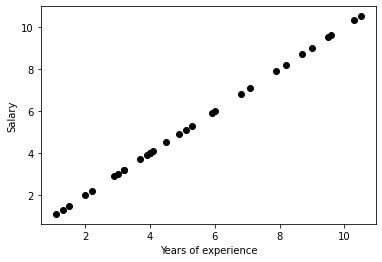

In [2]:
dataset = pd.read_csv('Salary_Data.csv')
x = dataset.iloc[:,0].values
y = dataset.iloc[:,0].values

plt.scatter(x,y,color="black")
plt.xlabel("Years of experience")
plt.ylabel("Salary",rotation=90)
plt.show()

**Algoritmo de gradiente descendiente**

In [3]:
theta = np.array([[0],[0]]) #Valores iniciales de la recta
ep = 1e-1
lr=0.001
n_itier = 3000
y = y.reshape(len(y),1)
x_b = np.c_[np.ones((len(x))),x]

for it in range(n_itier):
    #Gradient
    pred = np.dot(x_b,theta)
    si=-lr*(x_b.T.dot((pred - y)))
    theta = theta + si;
    if LA.norm(si)<ep:
        break;

print("Iterations: %d" %it)
rms = mean_squared_error(y,theta[0]*x+theta[1] , squared=False)
print("RMS_gradient = %f" %rms)
print("θ0 =",theta[0])
print("10 =",theta[1])

Iterations: 2
RMS_gradient = 4.302076
θ0 = [0.14261576]
10 = [0.9799663]


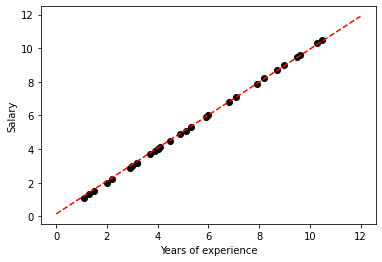

In [22]:
plt.scatter(x,y,color="black")
plt.xlabel("Years of experience")
plt.ylabel("Salary",rotation=90)

#Graficar linea de predicción
xP = np.linspace(0,12,500)
yP = theta[0] + theta[1]*xP

plt.plot(xP,yP,'--r')

plt.show()

**Ejemplo bidimensional del gradiente decendiente**

      mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1            70       1          buick sk

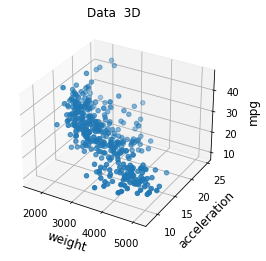

In [28]:
dataset = pd.read_csv('auto-mpg.csv')
print(dataset)
# dataset= dataset.drop(labels=8, axis=0)
vary=0
var1=4
var2=5

x1 = dataset.iloc[:, var1].values #Feature matrix
x2 = dataset.iloc[:, var2].values #Criterion Matrix 
y = dataset.iloc[:, vary].values #Criterion Matrix 
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter3D(x1,x2,y)
plt.title("Data  3D ")


ax.set_xlabel(dataset.columns[var1], fontsize=12);
ax.set_ylabel(dataset.columns[var2], rotation=90, fontsize=12);
ax.set_zlabel(dataset.columns[vary], rotation=90, fontsize=12);

In [30]:
theta = np.array([[-10],[-10],[-10]])
ep=1e-4
lr =0.001
n_iter = 500
y=y.reshape((len(y), 1))
x_b = np.c_[np.ones((len(x1),1)),x1,x2]

#Standardization using z-score
nf,nc=x_b.shape
x_bs=x_b
for it in range(1,nc):
    m=np.mean(x_b[:,it])
    std=np.std(x_b[:,it])
    x_bs[:,it]=(x_b[:,it]-m)/std


    
for it in range(n_iter):
    #Gradient
    pred = np.dot(x_bs,theta)
    si=-lr*(x_bs.T.dot((pred - y)))
    theta = theta + si
    
    if LA.norm(si)<ep:
        break;

print("Iterations: %d" %it)

print("θ0 =",theta[0])
print("θ1 =",theta[1])
print("θ2 =",theta[2])

Iterations: 39
θ0 = [23.51457281]
θ1 = [-6.20451092]
θ2 = [0.69061318]


(209, 305)
(209, 305)
(209, 305)


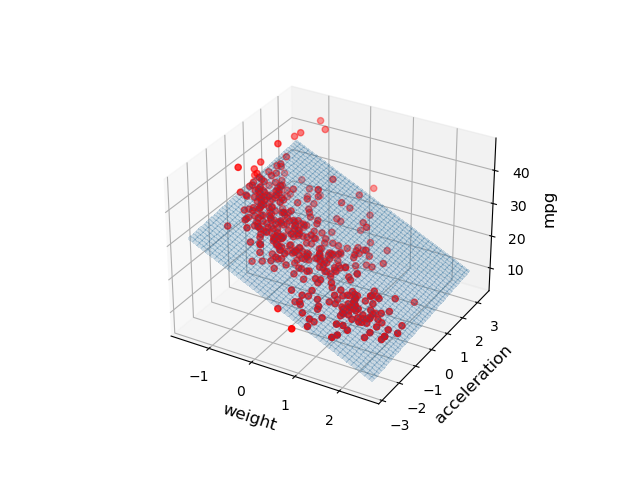

In [39]:
x1 = np.arange(np.min(x_bs[:,1]), np.max(x_bs[:,1]), 0.02)
x2 = np.arange(np.min(x_bs[:,2]), np.max(x_bs[:,2]), 0.02)
plane=np.zeros([len(x1),len(x2)])

for i in range(len(x1)):
    for j in range(len(x2)):
        plane[i,j]=np.dot(np.c_[1,x1[i],x2[j]],theta)
X1, X2 = np.meshgrid(x1, x2, indexing = 'ij')
print(X1.shape)
print(X2.shape)
print(plane.shape)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X1,X2, plane,
                       linewidth=0, antialiased=False,alpha=0.2)
ax.scatter(x_bs[:,1], x_bs[:,2], y, c='r', marker='o')
ax.set_xlabel(dataset.columns[var1], fontsize=12);
ax.set_ylabel(dataset.columns[var2], rotation=90, fontsize=12);
ax.set_zlabel(dataset.columns[vary], rotation=90, fontsize=12);